Text(0.5, 1.0, 'Data visualization')

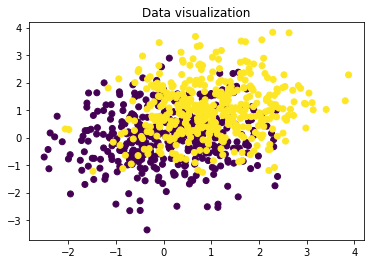

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [2]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [3]:
def KNN(data_train,label,data_test,K):
  def euclidean_distance(row1, row2):
    return np.linalg.norm(row1-row2)
  def get_neighbors(train,label_train, test_row, num_neighbors):
    dist=[]
    for point,label in zip(train,label_train):
      dist.append([euclidean_distance(point,test_row),label])
    neighbors=sorted(dist)[:num_neighbors]
    return np.array(neighbors)
  def predict_classification(neigbors):
    k=max(neigbors[:,1])
    arr=[0 for _ in range(int(k+1))]
    for n in neigbors:
      arr[int(n[1])]+=1
    prediction=np.argmax(arr)
    return prediction

  pred_label=np.zeros(data_test.shape[0])
  for i in range(data_test.shape[0]):
    neig=get_neighbors(data_train,label, data_test[i,:], K)
    pred_label[i]=predict_classification(neig)
  
  return pred_label

In [4]:
pred_label=KNN(data_train,label,data_test,2) # K=2
accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')

Testing Accuracy= 65.5 %


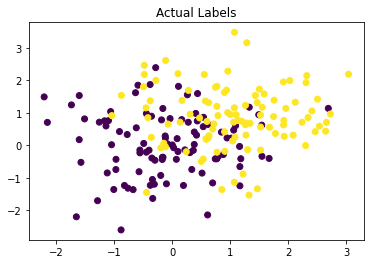

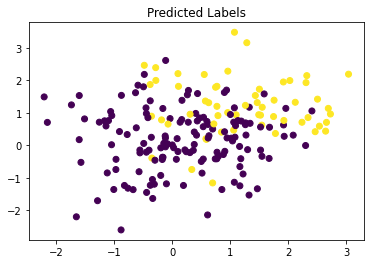

In [5]:
plt.figure()
plt.scatter(data_test[:,0],data_test[:,1],c=label_test)
plt.title('Actual Labels')
plt.figure()
plt.scatter(data_test[:,0],data_test[:,1],c=pred_label)
plt.title('Predicted Labels')
plt.show()